<a href="https://colab.research.google.com/github/UwailaEkhator/Accented-English-Speech-Recognition-and-Transcription/blob/main/Performance_Analysis_of_Whisper_%26_Speech2Text_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP PROJECT
- Sharadha
- Tapiwa
- Uwaila

## Setting up Speech2Text

#### Installing the libraries

In [ ]:
!pip install datasets
import torch
from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration
from datasets import load_dataset
!pip install transformers "[speech, sentencepiece]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.3 MB/s eta 0:00:00
ERROR: Invalid requirement: '[speech, sentencepiece]'


In [ ]:
# Loading the Speech2Text model from Hugging face
model_S2C = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")

# Testing the Speech2Text model with demo data
ds = load_dataset("hf-internal-testing/librispeech_asr_demo", "clean", split="validation")
inputs = processor(ds[0]["audio"]["array"], sampling_rate=ds[0]["audio"]["sampling_rate"], return_tensors="pt")
generated_ids = model_S2C.generate(inputs["input_features"], attention_mask=inputs["attention_mask"])

# Generating Transcriptions
transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)
transcription

Some weights of Speech2TextForConditionalGeneration were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr and are newly initialized: ['model.decoder.embed_positions.weights', 'model.encoder.embed_positions.weights']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for hf-internal-testing/librispeech_asr_demo contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hf-internal-testing/librispeech_asr_demo
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


['mister quilter is the apostle of the middle classes and we are glad to welcome his gospel']

## Setting up Whisper

#### Installing the libraries

In [ ]:
!pip install openai-whisper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using c

In [ ]:
from datasets import load_dataset
from transformers import WhisperProcessor, WhisperForConditionalGeneration

# Select an audio file and read it:
ds = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation")
audio_sample = ds[0]["audio"]
waveform = audio_sample["array"]
sampling_rate = audio_sample["sampling_rate"]

# Load the Whisper model in Hugging Face format:
processor = WhisperProcessor.from_pretrained("openai/whisper-tiny.en")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-tiny.en")

# Use the model and processor to transcribe the audio:
input_features = processor(
    waveform, sampling_rate=sampling_rate, return_tensors="pt"
).input_features

# Generate token ids
predicted_ids = model.generate(input_features)

# Decode token ids to text
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)

transcription[0]

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for hf-internal-testing/librispeech_asr_dummy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hf-internal-testing/librispeech_asr_dummy
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating validation split: 0 examples [00:00, ? examples/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/151M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.62k [00:00<?, ?B/s]

' Mr. Quilter is the apostle of the middle classes, and we are glad to welcome his gospel.'

## Importing our Dataset and Data Cleaning

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv("/content/drive/Shareddrives/NLP Shared/NLP Project/archive/speakers_all_droppedTrue.csv")
data

,id,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,NaN,NaN,NaN
1,2,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,NaN,NaN,NaN
2,3,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,NaN,NaN,NaN
3,4,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,NaN,NaN,NaN
4,5,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2136,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,NaN,NaN,NaN
2136,2137,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,NaN,NaN,NaN
2137,2138,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,NaN,NaN,NaN
2138,2139,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Removing NaN columns
data.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'], inplace=True)

In [ ]:
#Function to filter one male and one female from each native language
def filterBySex(group):
    male = group[group['sex'] == 'male'].head(1)
    female = group[group['sex'] == 'female'].head(1)
    return pd.concat([male, female])

#Applying the function to the native language groups
newData = data.groupby('native_language', as_index=False).apply(filterBySex).reset_index(drop=True)



In [ ]:
newData

,id,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
0,2,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa
1,1,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa
2,6,25.0,15.0,"diekabo, ivory coast",agni1,agni,male,3,ivory coast
3,7,41.0,5.0,"accra, ghana",akan1,akan,male,979,ghana
4,8,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo
...,...,...,...,...,...,...,...,...,...
299,2130,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada
300,2134,20.0,20.0,"cotonou, benin",yoruba1,yoruba,male,414,benin
301,2135,40.0,2.0,"ibadan, oyo, nigeria",yoruba2,yoruba,female,756,nigeria
302,2139,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa


In [ ]:
#Dropping native languages that have just one gender i.e either male or female
nativeLangWithBoth = []
for lang in newData.native_language.unique():
    language_df = newData[newData['native_language'] == lang]
    if 'male' in language_df['sex'].values  and 'female' in language_df['sex'].values:
        nativeLangWithBoth.append(lang)
filtered_newData = newData[newData['native_language'].isin(nativeLangWithBoth)].reset_index(drop=True)

In [ ]:
filtered_newData

,id,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
0,2,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa
1,1,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa
2,8,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo
3,13,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo
4,24,31.0,12.0,"addis ababa, ethiopia",amharic14,amharic,male,1515,ethiopia
...,...,...,...,...,...,...,...,...,...
199,2123,50.0,14.0,"taipei, taiwan",xiang1,xiang,female,208,taiwan
200,2129,60.0,8.0,"st. etienne, france",yiddish1,yiddish,male,404,france
201,2130,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada
202,2134,20.0,20.0,"cotonou, benin",yoruba1,yoruba,male,414,benin


In [ ]:
#Dropping the id column
filtered_newData.drop(columns = ['id'], inplace=True)

In [ ]:
#Using the inbuilt pandas id column as the new id
filtered_newData.index = [x for x in range(1, len(filtered_newData.values)+1)]

In [ ]:
#renaming the inbuilt pandas id column to id
filtered_newData.index.name = 'id'

In [ ]:
filtered_newData

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country
id,,,,,,,,
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa
2,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa
3,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo
4,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo
5,31.0,12.0,"addis ababa, ethiopia",amharic14,amharic,male,1515,ethiopia
...,...,...,...,...,...,...,...,...
200,50.0,14.0,"taipei, taiwan",xiang1,xiang,female,208,taiwan
201,60.0,8.0,"st. etienne, france",yiddish1,yiddish,male,404,france
202,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada


## Filtering our audio folder to include only the audio for the filtered_newData dataframe above

In [ ]:
import os

# Define the path to the recordings folder
folder_path = '/content/drive/Shareddrives/NLP Shared/NLP Project/archive/recordings/recordings'

# Get a list of all MP3 files in the folder
mp3_files = [file for file in os.listdir(folder_path) if file.endswith('.mp3')]

# Create a dataframe with the file names as a column
df_audio = pd.DataFrame(mp3_files, columns=['File Name'])

# Display the dataframe
print(df_audio)

           File Name
0     hungarian6.mp3
1     hungarian1.mp3
2        hebrew9.mp3
3         hmong1.mp3
4         hindi8.mp3
...              ...
2133     arabic9.mp3
2134    arabic75.mp3
2135    arabic68.mp3
2136    arabic79.mp3
2137     basque1.mp3

[2138 rows x 1 columns]


In [ ]:
df_audio.index = [x for x in range(1, len(df_audio.values)+1)]
df_audio.index.name = 'Fid'

In [ ]:
df_audio

,File Name
Fid,
1,hungarian6.mp3
2,hungarian1.mp3
3,hebrew9.mp3
4,hmong1.mp3
5,hindi8.mp3
...,...
2134,arabic9.mp3
2135,arabic75.mp3
2136,arabic68.mp3


In [ ]:
#Filtering the audio data frame 'df_audio' using the 'filename' column in 'filtered_newData'

#removing .mp3 from 'df_audio' dataframe
df_audio['File Name']=df_audio['File Name'].str.replace('.mp3', '')

#Getting the file names from filtered_newData
filenames_to_filter = filtered_newData['filename']

#filtering 'df_audio' using 'filenames_to_filter'
filtered_df_audio = df_audio[df_audio['File Name'].isin(filenames_to_filter)].reset_index(drop=True)

In [ ]:
#Appending .mp3 back into the file names
filtered_df_audio['File Name'] = filtered_df_audio['File Name'].apply(lambda x: x + '.mp3')

In [ ]:
#Renaming and editing index column to start from 1
filtered_df_audio.index = [x for x in range(1, len(filtered_df_audio.values)+1)]
filtered_df_audio.index.name = 'Fid'


In [ ]:
filtered_df_audio

,File Name
Fid,
1,hungarian1.mp3
2,icelandic1.mp3
3,hindi10.mp3
4,ibibio2.mp3
5,icelandic2.mp3
...,...
200,amharic14.mp3
201,afrikaans2.mp3
202,arabic10.mp3


In [ ]:
!pip install requests
import os
import shutil

In [ ]:
# Loading a DataFrame with desired file names from filtered_df_audio DataFrame

file_names_df = pd.DataFrame({'File Name':filtered_df_audio['File Name'][:]})

# Specifying the path to source folder containing MP3 files
source_folder = '/content/drive/Shareddrives/NLP Shared/NLP Project/archive/recordings/recordings'

# Specifying the path to the new folder for storing filtered MP3 files
new_folder = '/content/drive/Shareddrives/NLP Shared/NLP Project/new_recordings2'


# Function to filter and copy MP3 files
def filter_and_copy_mp3(source_folder, new_folder, file_names_df):
    for index, row in file_names_df.iterrows():
        filename = row['File Name']
        source_file = os.path.join(source_folder, filename)
        target_file = os.path.join(new_folder, filename)
        shutil.copyfile(source_file, target_file)

# Calling the function to filter and copy MP3 files
filter_and_copy_mp3(source_folder, new_folder, file_names_df)

In [ ]:
files_in_folder = os.listdir(new_folder)

# Display the files in the folder
print("Files in the new folder:")
for file in files_in_folder:
    print(file)

# Count the number of files in the folder
num_files = len(files_in_folder)
print(f"Number of recordings in the new folder: {num_files}")

Files in the new folder:
ibibio2.mp3
icelandic2.mp3
icelandic1.mp3
hungarian1.mp3
hindi10.mp3
indonesian1.mp3
indonesian3.mp3
italian1.mp3
igbo2.mp3
igbo1.mp3
italian10.mp3
japanese1.mp3
japanese12.mp3
kazakh1.mp3
kiswahili5.mp3
kiswahili1.mp3
kikuyu1.mp3
kazakh3.mp3
khmer2.mp3
kikuyu3.mp3
korean1.mp3
khmer1.mp3
korean13.mp3
krio2.mp3
kurdish3.mp3
krio1.mp3
lao3.mp3
luo2.mp3
macedonian1.mp3
luo1.mp3
lao1.mp3
macedonian10.mp3
malay1.mp3
kurdish1.mp3
mandarin10.mp3
malayalam1.mp3
malay2.mp3
mandarin1.mp3
malayalam2.mp3
marathi1.mp3
marathi2.mp3
mende1.mp3
miskito1.mp3
mende2.mp3
miskito11.mp3
nepali3.mp3
norwegian3.mp3
ngemba1.mp3
oromo2.mp3
ngemba2.mp3
oromo1.mp3
mongolian1.mp3
mongolian2.mp3
norwegian1.mp3
nepali1.mp3
papiamentu1.mp3
pashto6.mp3
polish12.mp3
papiamentu2.mp3
pashto1.mp3
polish1.mp3
portuguese10.mp3
portuguese1.mp3
romanian1.mp3
pulaar1.mp3
punjabi4.mp3
romanian10.mp3
pulaar2.mp3
punjabi1.mp3
russian10.mp3
rotuman2.mp3
rotuman1.mp3
russian1.mp3
satawalese1.mp3
serbian10.

## Applying Speech2Text to all audio recordings in new_recordings 2 folder

In [ ]:
!pip install librosa
import librosa

In [ ]:
!pip install transformers"[speech, sentencepiece]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.4/427.4 kB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.2/458.2 kB 48.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.4/213.4 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 54.0 MB/s eta 0:00:00
  Created wheel for kenlm: filename=kenlm-0.2.0-cp310-cp310-linux_x86_64.whl size=3184466 

In [ ]:
#folder containing the audio recordings
folder_path = '/content/drive/Shareddrives/NLP Shared/NLP Project/new_recordings2'

# Get the list of files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty dictionary to store file name - transcription mappings
transcription_dict = {}

# Iterate over each file in the folder
for filename in file_list:
    # Construct the full path to the file
    full_path = os.path.join(folder_path, filename)

    # Load the audio file
    audio, sr = librosa.load(full_path, sr=16000)

    # Process the audio
    inputs = processor(audio, sampling_rate=sr, return_tensors="pt")
    generated_ids = model_S2C.generate(inputs["input_features"], attention_mask=inputs["attention_mask"])
    transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)
    #cleaned_transcription = transcription.strip("[]").strip("'").strip('"')

    # Add the transcription to the dictionary with the file name as the key
    transcription_dict[filename] = transcription

In [ ]:
#Exporting the Speech2Text transcriptions as a csv file
import csv
output_csv = 'newSpeech2text_transcriptions.csv'

with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['File Name', 'Transcription'])

    for key, value in transcription_dict.items():
        writer.writerow([key, value])

## Applying Whisper to all audio recordings in new_recordings2 folder

In [ ]:
# Path to the directory containing audio files
input_folder = '/content/drive/Shareddrives/NLP Shared/NLP Project/new_recordings2'

# Check if the directory exists
if not os.path.isdir(input_folder):
    print(f"The directory '{input_folder}' does not exist.")
    exit()

# List all audio files in the directory
audio_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.mp3')])

# Check if any audio files are found
if not audio_files:
    print(f"No audio files found in '{input_folder}'.")
    exit()

# Load the Whisper model and processor
processor = WhisperProcessor.from_pretrained("openai/whisper-tiny.en")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-tiny.en")

# List to store transcriptions
transcriptions = {}

# Process each audio file in the list
for audio_file in audio_files:
    audio_path = os.path.join(input_folder, audio_file)

    # Load the audio file and resample to 16000 Hz
    audio, sr = librosa.load(audio_path, sr=16000)

    # Use the model and processor to transcribe the audio
    input_features = processor(audio, sampling_rate=sr, return_tensors="pt").input_features
    predicted_ids = model.generate(input_features)
    transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)[0]

    # Append transcription to the list
    transcriptions[audio_file] = transcription


In [ ]:
# Path to the output CSV file
output_csv = 'newwhisper_transcriptions.csv'

# Write transcriptions to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['File Name', 'Transcription'])

    for key, value in transcriptions.items():
        writer.writerow([key, value])

After the above steps, we used excel to merge the csv files together to get the dataset that we have imported below:


In [ ]:
post_data= pd.read_csv("/content/drive/Shareddrives/NLP Shared/NLP Project/uopdatedData.csv")
post_data

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,Speech2Text Transcription,Whisper_Transcription
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,please call stella ask her to bring these thin...,"Please call Stala, ask her to bring these thi..."
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,please call stella ask her to bring these thin...,"Please call Stella, ask her to bring these th..."
2,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,please call stella ask her to bring these thin...,"Please call Stella, ask her to bring these th..."
3,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo,these calls stella ask her to bring these thin...,Please call Stella. I was going to bring thes...
4,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,when the tea is called a steel ask her to brin...,Please call still. Asker to bring these thing...
...,...,...,...,...,...,...,...,...,...,...
199,30.0,12.0,"changsha, hunan, china",xiang2,xiang,male,1417,china,please costella ask her to bring these things ...,"Please cost Ella, ask her to bring lead thing..."
200,60.0,8.0,"st. etienne, france",yiddish1,yiddish,male,404,france,please call stella ask her to bring these thin...,Please call Stella. As could to bring these t...
201,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada,please call stella ask her to bring these thin...,"Please call Stella, ask her to bring these th..."
202,20.0,20.0,"cotonou, benin",yoruba1,yoruba,male,414,benin,little girl's tail ask her to bring these thin...,Please call Stella. Ask her to bring these th...


In [ ]:
#storing the reference text
reference_text = 'Please call Stella.  Ask her to bring these things with her from the store:  Six spoons of fresh snow peas, five thick slabs of blue cheese, and maybe a snack for her brother Bob.  We also need a small plastic snake and a big toy frog for the kids.  She can scoop these things into three red bags, and we will go meet her Wednesday at the train station.'

## Applying WER to the entire Speech2Text transcriptions

In [ ]:
!pip install evaluate
from evaluate import load
!pip install jiwer
wer = load("wer")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.9 MB/s eta 0:00:00


In [ ]:
# Create an empty list to store the WER scores
wer_scores = []

# Iterate over each item in the 'Speech2Text Transcription' column
for transcription in post_data['Speech2Text Transcription']:
    # Compute the WER score
    wer_score = wer.compute(predictions=[transcription], references=[reference_text])
    # Append the WER score to the list
    wer_scores.append(wer_score)

# Add the list of WER scores as a new column to the dataframe
post_data['WER_Speech2Text'] = wer_scores

## Applying WER to the entire Whisper transcriptions

In [ ]:
# Create an empty list to store the WER scores
wer_scores2 = []

# Iterate over each item in the 'Whisper_Transcription' column
for transcription2 in post_data['Whisper_Transcription']:
    # Compute the WER score
    wer_score = wer.compute(predictions=[transcription2], references=[reference_text])
    # Append the WER score to the list
    wer_scores2.append(wer_score)

# Add the list of WER scores as a new column to the dataframe
post_data['WER_Whisper'] = wer_scores2

In [ ]:
post_data

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,Speech2Text Transcription,Whisper_Transcription,WER_Speech2Text,WER_Whisper
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,please call stella ask her to bring these thin...,"Please call Stala, ask her to bring these thi...",0.333333,0.144928
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,please call stella ask her to bring these thin...,"Please call Stella, ask her to bring these th...",0.231884,0.057971
2,19.0,6.0,"prishtina, kosovo",albanian1,albanian,male,4,kosovo,please call stella ask her to bring these thin...,"Please call Stella, ask her to bring these th...",0.478261,0.115942
3,25.0,11.0,"prishtina, kosovo",albanian6,albanian,female,1081,kosovo,these calls stella ask her to bring these thin...,Please call Stella. I was going to bring thes...,0.347826,0.173913
4,20.0,5.0,"addis ababa, ethiopia",amharic1,amharic,female,6,ethiopia,when the tea is called a steel ask her to brin...,Please call still. Asker to bring these thing...,0.724638,0.463768
...,...,...,...,...,...,...,...,...,...,...,...,...
199,30.0,12.0,"changsha, hunan, china",xiang2,xiang,male,1417,china,please costella ask her to bring these things ...,"Please cost Ella, ask her to bring lead thing...",0.449275,0.115942
200,60.0,8.0,"st. etienne, france",yiddish1,yiddish,male,404,france,please call stella ask her to bring these thin...,Please call Stella. As could to bring these t...,0.275362,0.115942
201,78.0,6.0,"winnipeg, manitoba, canada",yiddish2,yiddish,female,405,canada,please call stella ask her to bring these thin...,"Please call Stella, ask her to bring these th...",0.304348,0.101449
202,20.0,20.0,"cotonou, benin",yoruba1,yoruba,male,414,benin,little girl's tail ask her to bring these thin...,Please call Stella. Ask her to bring these th...,2.362319,0.405797


##Confusion Matrix comparison

## Data Analysis and Plots

### Maximum WER in Speech2Text:

In [ ]:
max_wer = max(post_data['WER_Speech2Text'])
native_language_max_wer = post_data.loc[post_data['WER_Speech2Text'] == max_wer, 'native_language'].values[0]
sex_max_wer = post_data.loc[post_data['WER_Speech2Text'] == max_wer, 'sex'].values[0]

#printing the outputs
max_wer, native_language_max_wer, sex_max_wer

(2.4927536231884058, 'korean', 'male')

### Maximum WER in Whisper:

In [ ]:
max_wer = max(post_data['WER_Whisper'])
native_language_max_wer = post_data.loc[post_data['WER_Whisper'] == max_wer, 'native_language'].values[0]
sex_max_wer = post_data.loc[post_data['WER_Whisper'] == max_wer, 'sex'].values[0]

#printing the utputs
max_wer, native_language_max_wer, sex_max_wer

(0.8985507246376812, 'mende', 'female')

From the above, Speech2Text had the highest WER for males with Korean as their native language, while Whisper had the highest WER for females with Mende as their native language.

### Minimum WER in Speech2Text:

In [ ]:
min_wer = min(post_data['WER_Speech2Text'])
native_language_min_wer = post_data.loc[post_data['WER_Speech2Text'] == min_wer, 'native_language'].values[0]
sex_min_wer = post_data.loc[post_data['WER_Speech2Text'] == min_wer, 'sex'].values[0]

#printing the outputs
min_wer, native_language_min_wer, sex_min_wer

(0.21739130434782608, 'english', 'male')

### Minimum WER in Whisper:

In [ ]:
min_wer = min(post_data['WER_Whisper'])
native_language_min_wer = post_data.loc[post_data['WER_Whisper'] == min_wer, 'native_language'].values[0]
sex_max_wer = post_data.loc[post_data['WER_Whisper'] == max_wer, 'sex'].values[0]

#printing the outputs
min_wer, native_language_min_wer, sex_min_wer

(0.028985507246376812, 'catalan', 'male')

From the above, Speech2Text had the lowest WER for males with English as their native language, while Whisper had the lowest WER for males with Catalan as their native language.

### Plotting Speech2text WER against native language




In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<ipython-input-48-1d9827e7bd0d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=post_data, x="native_language", y="WER_Speech2Text", hue="sex", ax=ax,


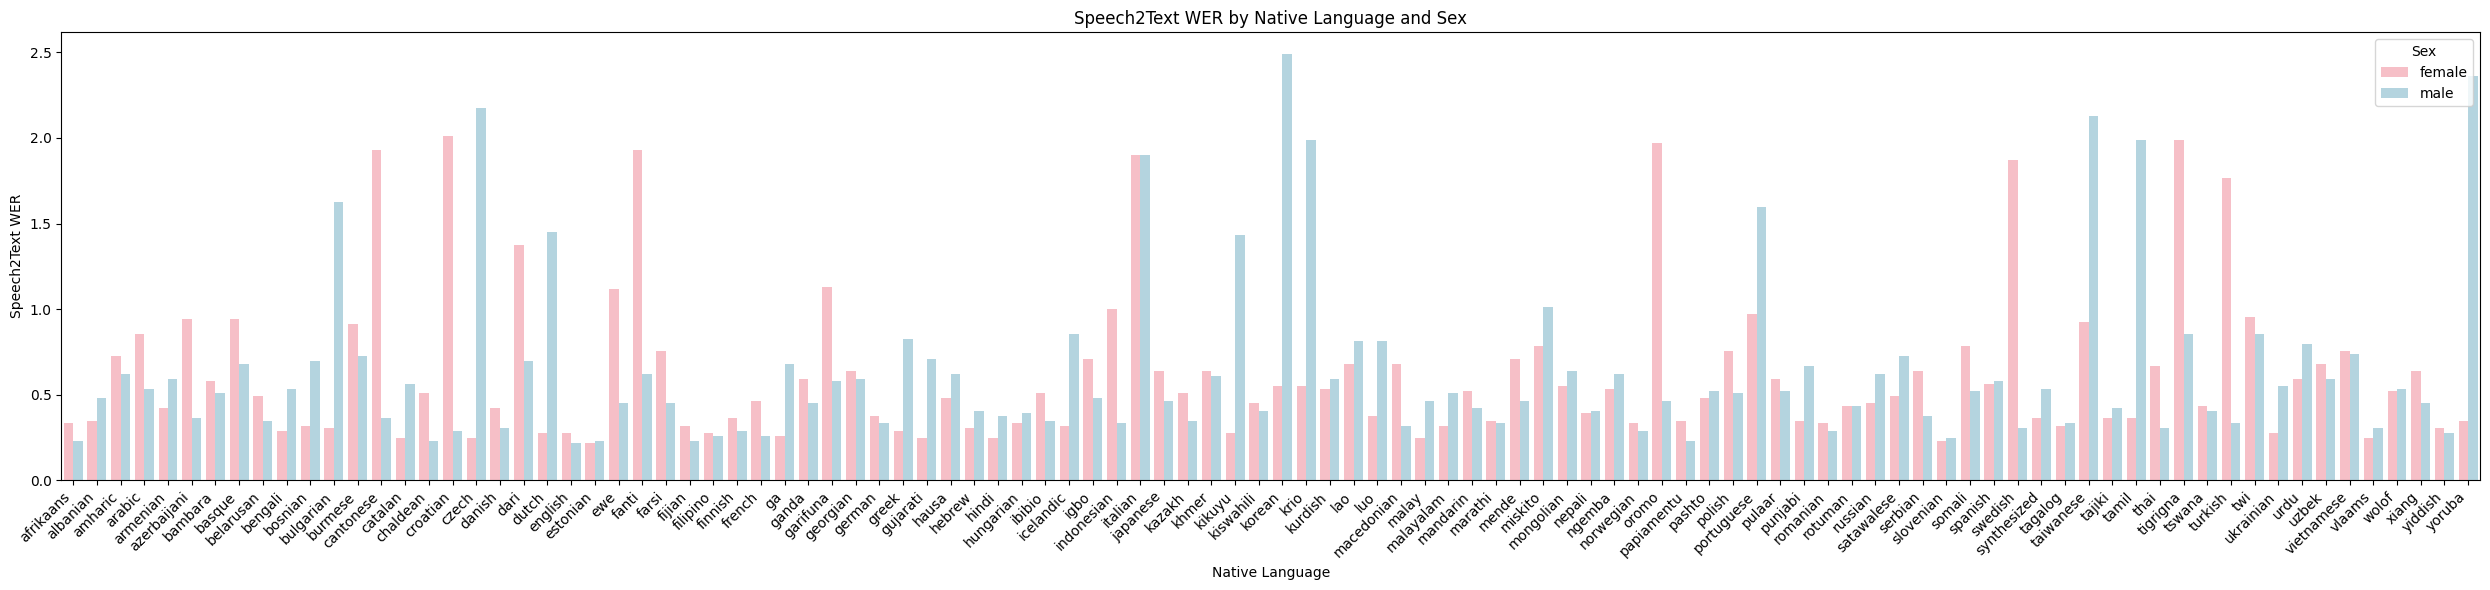

In [ ]:
#Plotting by sex

# Grouped bar plot
f = plt.figure(figsize=(25, 6))
ax = f.add_subplot(1, 1, 1)
color_palette = {"male": "lightblue", "female": "lightpink"}

# Plot
sns.barplot(data=post_data, x="native_language", y="WER_Speech2Text", hue="sex", ax=ax,
            palette=color_palette, ci=None)

# Customizing the plot
ax.set_title("Speech2Text WER by Native Language and Sex")
ax.set_xlabel("Native Language")
ax.set_ylabel("Speech2Text WER")
ax.legend(title="Sex", loc="upper right")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


<ipython-input-49-46980770a479>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_wer, x="native_language", y="WER_Speech2Text", ax=ax,
<ipython-input-49-46980770a479>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_wer, x="native_language", y="WER_Speech2Text", ax=ax,
<ipython-input-49-46980770a479>:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in legend_colors]


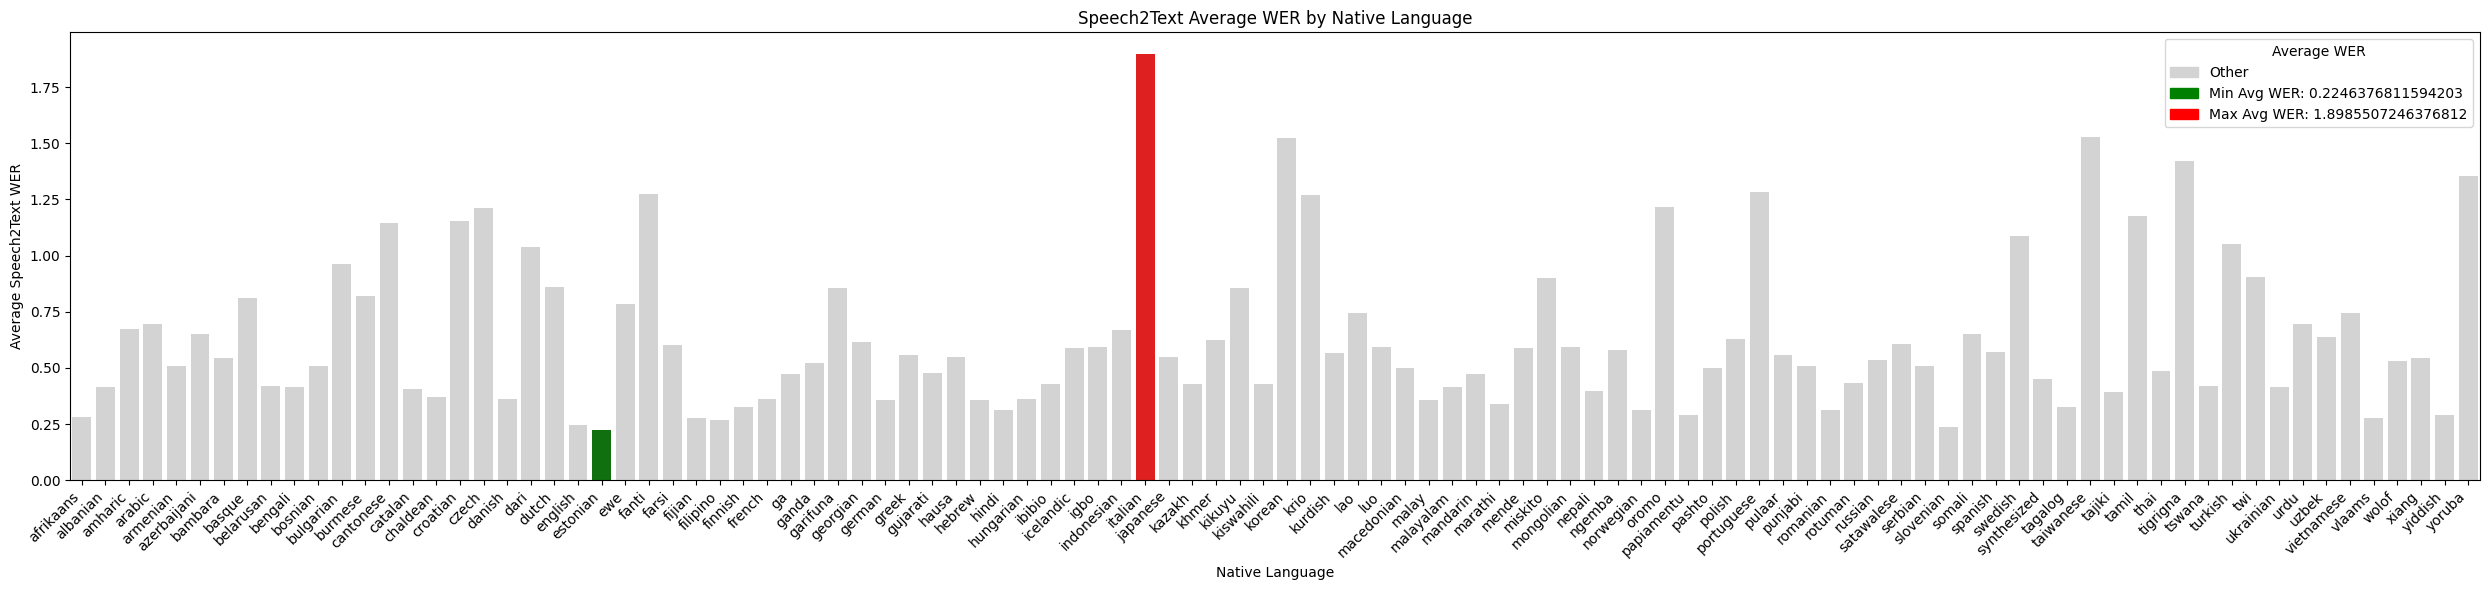

In [ ]:
#Plotting by average WER in each native language

# Calculate average WER by native language
average_wer = post_data.groupby('native_language')['WER_Speech2Text'].mean().reset_index()

# Find minimum and maximum average WER values
min_avg_wer = average_wer['WER_Speech2Text'].min()
max_avg_wer = average_wer['WER_Speech2Text'].max()

# Define custom color palette
palette = ['lightgrey' if x != min_avg_wer and x != max_avg_wer else 'green' if x == min_avg_wer else 'red' for x in average_wer['WER_Speech2Text']]

# Grouped bar plot
f = plt.figure(figsize=(25, 6))
ax = f.add_subplot(1, 1, 1)

# Plot with custom color palette
sns.barplot(data=average_wer, x="native_language", y="WER_Speech2Text", ax=ax,
            palette=palette, ci=None)

# Customizing the plot
ax.set_title("Speech2Text Average WER by Native Language")
ax.set_xlabel("Native Language")
ax.set_ylabel("Average Speech2Text WER")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Add legend for custom colors
legend_labels = ['Other', f'Min Avg WER: {min_avg_wer}', f'Max Avg WER: {max_avg_wer}']
legend_colors = ['lightgrey', 'green', 'red']
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in legend_colors]
ax.legend(handles, legend_labels, title="Average WER", loc="upper right")

plt.show()

### Plotting Whisper WER against native language

<ipython-input-50-d948ca40f68d>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=post_data, x="native_language", y="WER_Whisper", hue="sex", ax=ax,


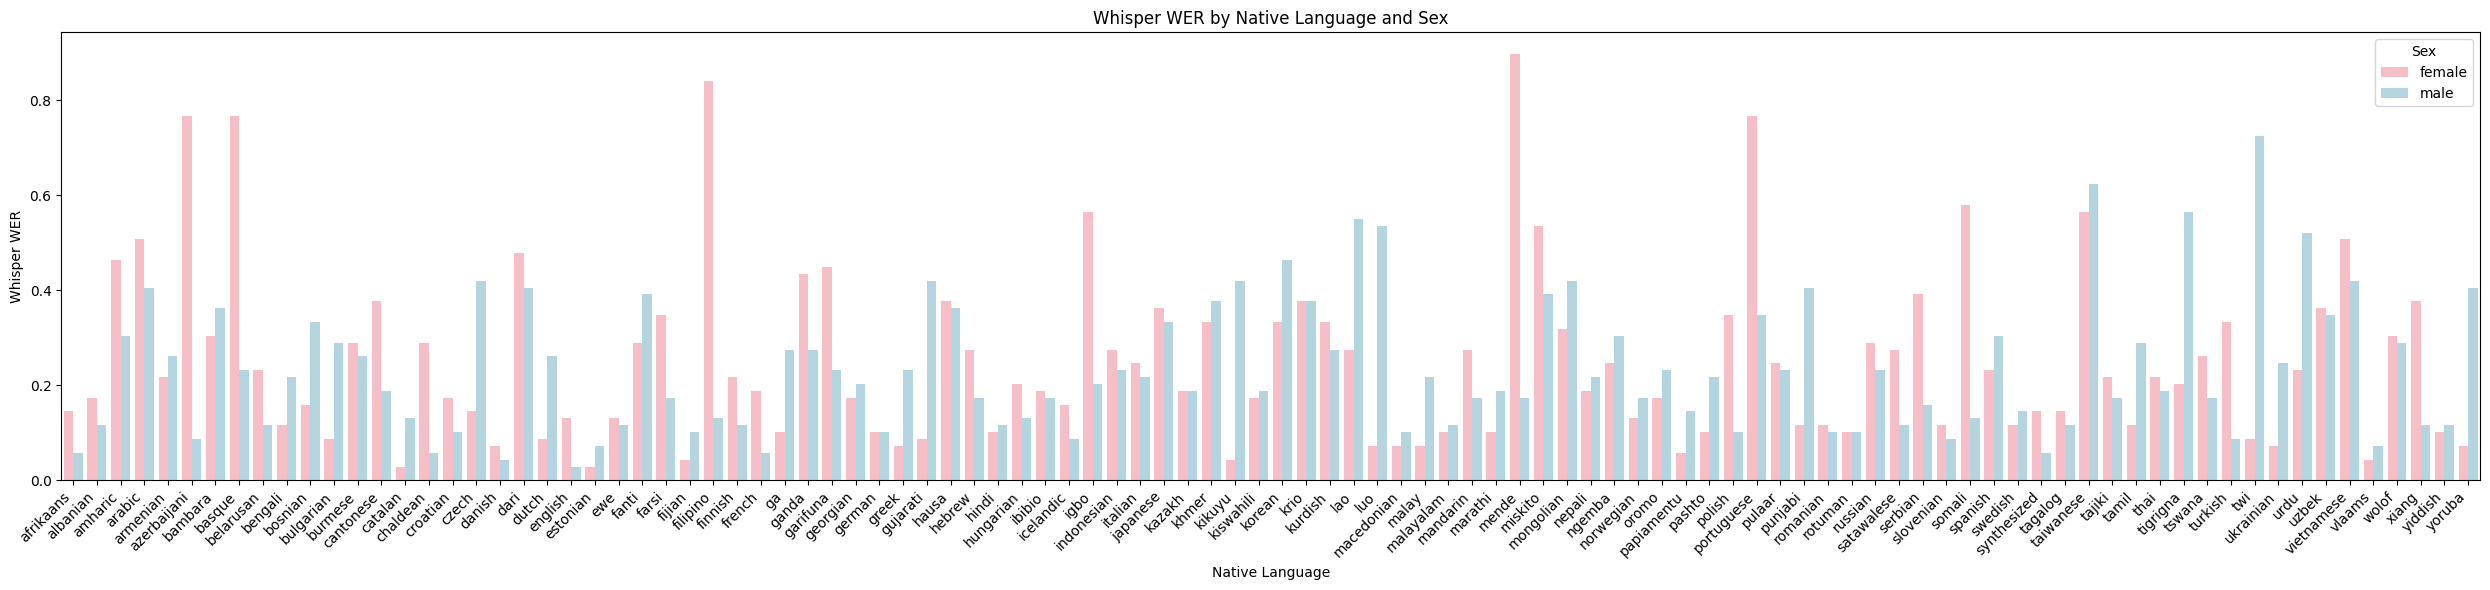

In [ ]:
#Plotting by sex

# Grouped bar plot
f = plt.figure(figsize=(25, 6))
ax = f.add_subplot(1, 1, 1)
color_palette = {"male": "lightblue", "female": "lightpink"}

# Plot
sns.barplot(data=post_data, x="native_language", y="WER_Whisper", hue="sex", ax=ax,
            palette=color_palette, ci=None)

# Customizing the plot
ax.set_title("Whisper WER by Native Language and Sex")
ax.set_xlabel("Native Language")
ax.set_ylabel("Whisper WER")
ax.legend(title="Sex", loc="upper right")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

plt.show()

<ipython-input-51-4e4ae5a37a54>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_wer, x="native_language", y="WER_Whisper", ax=ax,
<ipython-input-51-4e4ae5a37a54>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_wer, x="native_language", y="WER_Whisper", ax=ax,
<ipython-input-51-4e4ae5a37a54>:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in legend_colors]


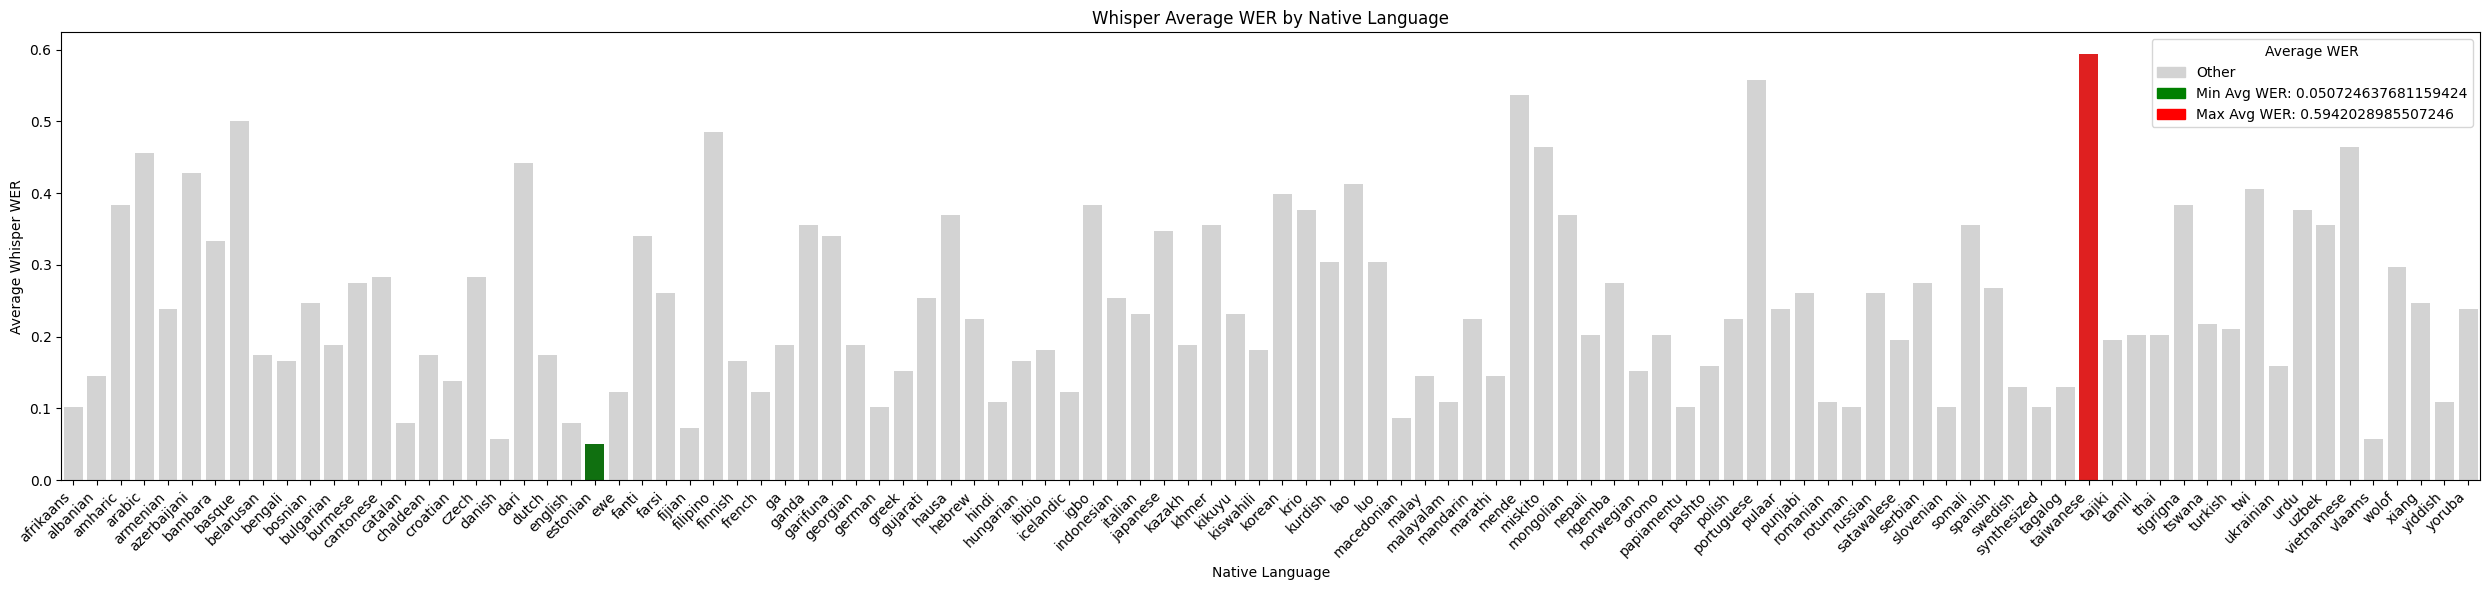

In [ ]:
#Plotting by average WER in each native language

# Calculate average WER by native language
average_wer = post_data.groupby('native_language')['WER_Whisper'].mean().reset_index()

# Find minimum and maximum average WER values
min_avg_wer = average_wer['WER_Whisper'].min()
max_avg_wer = average_wer['WER_Whisper'].max()

# Define custom color palette
palette = ['lightgrey' if x != min_avg_wer and x != max_avg_wer else 'green' if x == min_avg_wer else 'red' for x in average_wer['WER_Whisper']]

# Grouped bar plot
f = plt.figure(figsize=(25, 6))
ax = f.add_subplot(1, 1, 1)

# Plot with custom color palette
sns.barplot(data=average_wer, x="native_language", y="WER_Whisper", ax=ax,
            palette=palette, ci=None)

# Customizing the plot
ax.set_title("Whisper Average WER by Native Language")
ax.set_xlabel("Native Language")
ax.set_ylabel("Average Whisper WER")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Add legend for custom colors
legend_labels = ['Other', f'Min Avg WER: {min_avg_wer}', f'Max Avg WER: {max_avg_wer}']
legend_colors = ['lightgrey', 'green', 'red']
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in legend_colors]
ax.legend(handles, legend_labels, title="Average WER", loc="upper right")

plt.show()


### Speech2Text WER vs Age

<Figure size 2000x900 with 0 Axes>

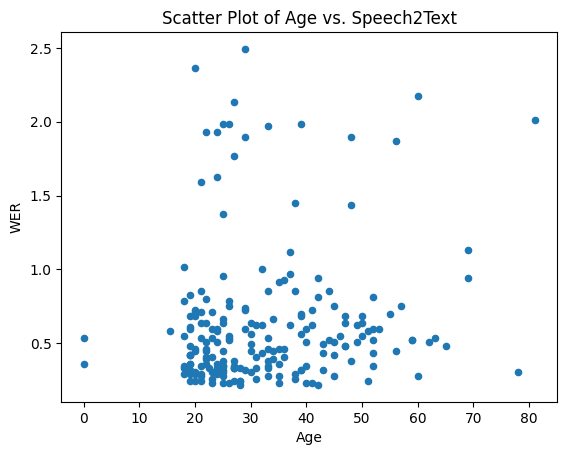

In [ ]:
plt.figure(figsize=(20, 9))
post_data.plot.scatter(x='age', y='WER_Speech2Text')
plt.title('Scatter Plot of Age vs. Speech2Text')
plt.xlabel('Age')
plt.ylabel('WER')
plt.show()

### Whisper WER vs Age

<Figure size 2000x900 with 0 Axes>

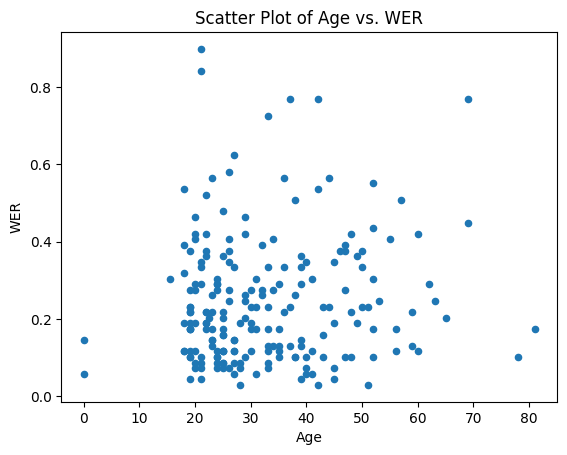

In [ ]:
# Investigate Factors Affecting WER
# For example, if 'age' is a variable in your dataset
plt.figure(figsize=(20, 9))
post_data.plot.scatter(x='age', y='WER_Whisper')
plt.title('Scatter Plot of Age vs. WER')
plt.xlabel('Age')
plt.ylabel('WER')
plt.show()

We can tell from the graph that the Word error rate is higher for the ages from 20 to 60

### Speech2Text WER vs Age on a line graph

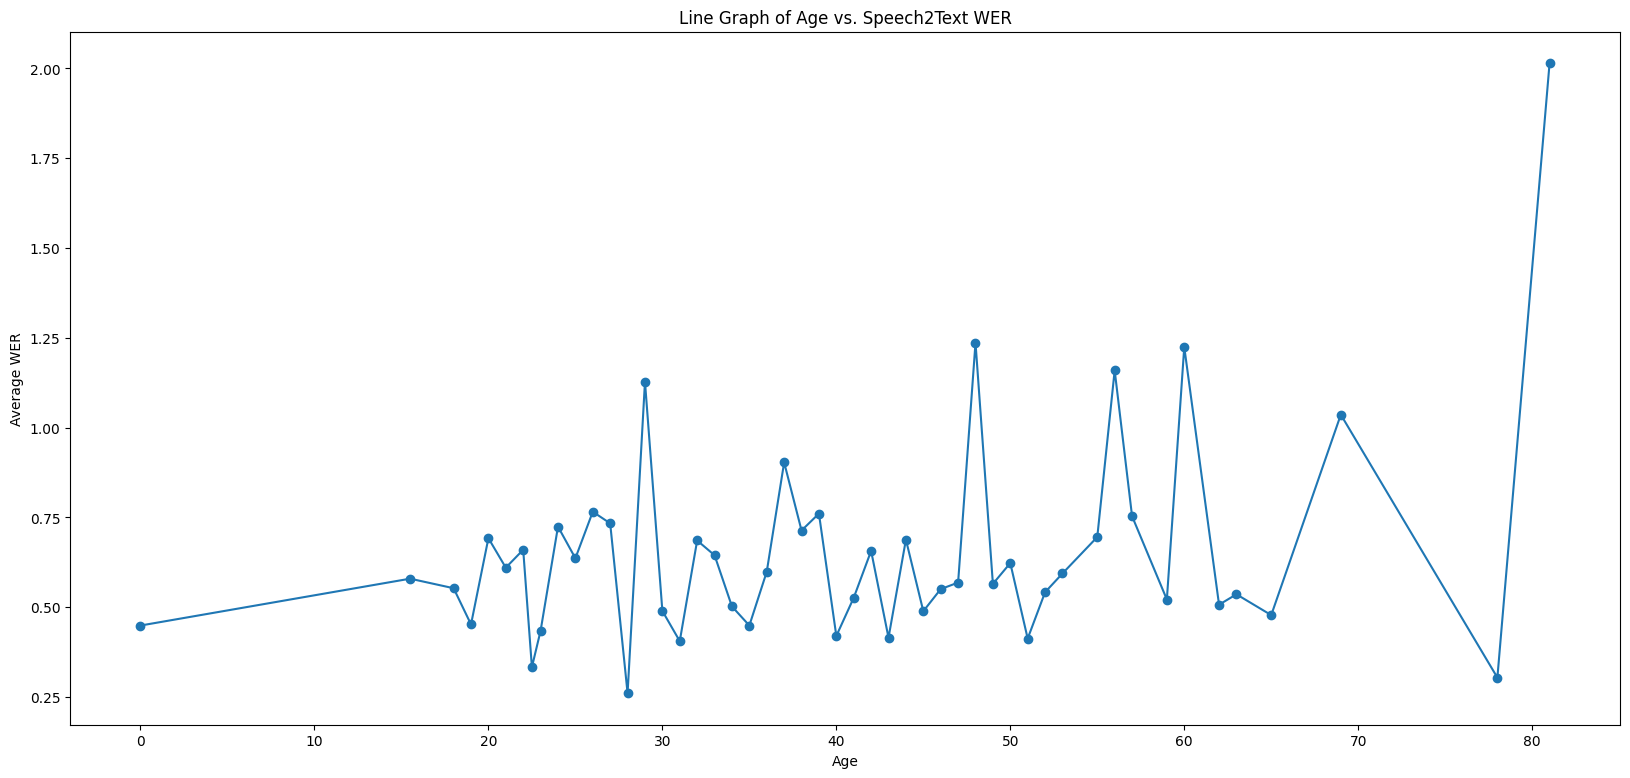

In [ ]:
# Group data by 'age' and calculate mean WER for each age
age_avg_wer = post_data.groupby('age')['WER_Speech2Text'].mean()

# Create a figure with specified figure size
plt.figure(figsize=(20, 9))

# Plotting the line graph
age_avg_wer.plot(kind='line', marker='o', linestyle='-')  # 'o' is for circle markers

# Adding plot titles and labels
plt.title('Line Graph of Age vs. Speech2Text WER')
plt.xlabel('Age')
plt.ylabel('Average WER')

# Show the plot
plt.show()

### Whisper WER vs Age on a line graph

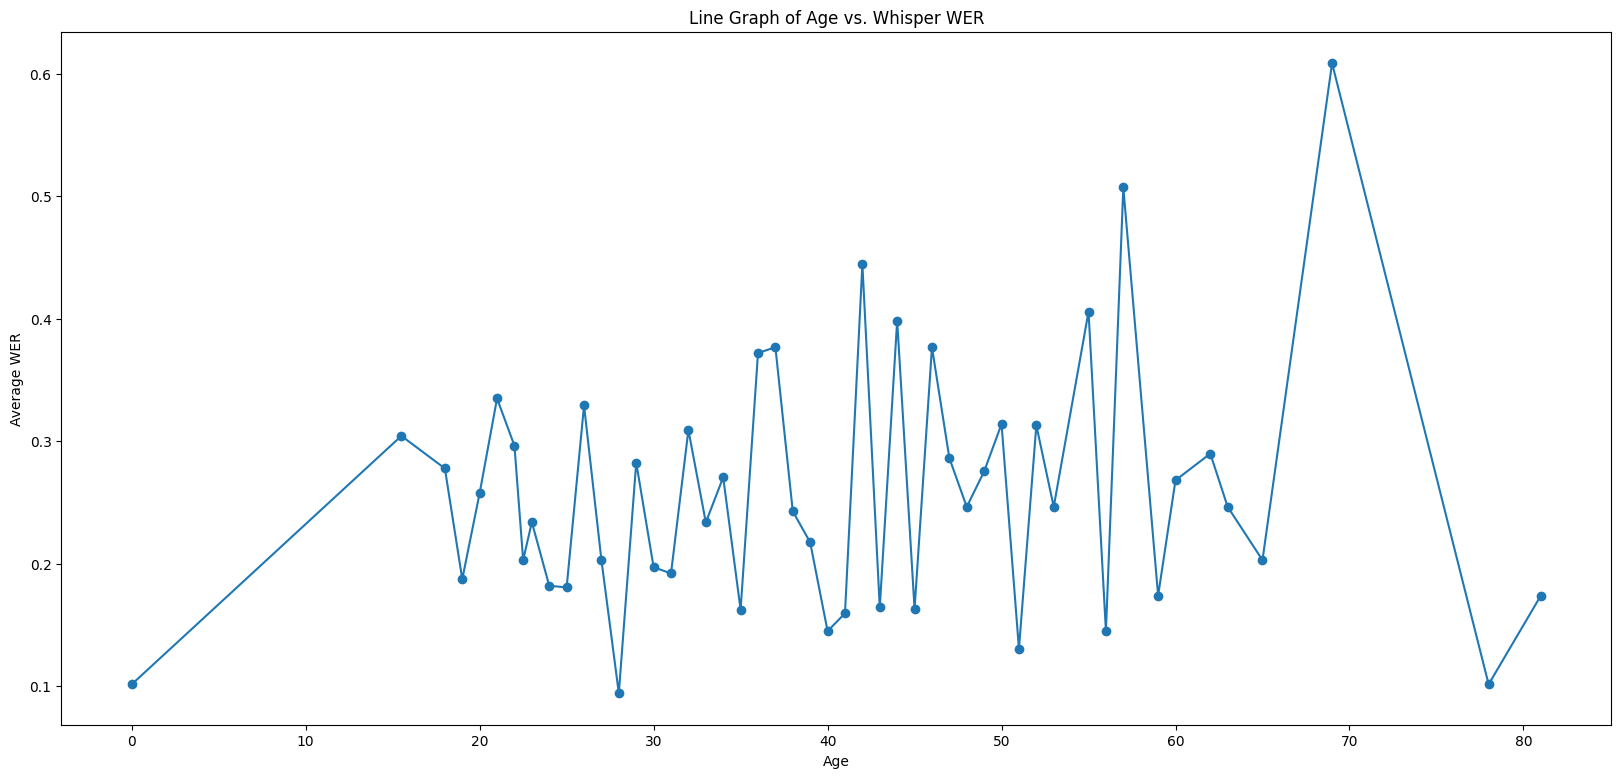

In [ ]:
# Group data by 'age' and calculate mean WER for each age
age_avg_wer = post_data.groupby('age')['WER_Whisper'].mean()

# Create a figure with specified figure size
plt.figure(figsize=(20, 9))

# Plotting the line graph
age_avg_wer.plot(kind='line', marker='o', linestyle='-')  # 'o' is for circle markers

# Adding plot titles and labels
plt.title('Line Graph of Age vs. Whisper WER')
plt.xlabel('Age')
plt.ylabel('Average WER')

# Show the plot
plt.show()

From the line graph we can see that WER got higher, as the age_onset value increased. Age onset represents the age in which the speakers started speaking english.

### Plotting Speech2text WER against Country

<ipython-input-56-b52b0eba98b7>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=post_data, x="country", y="WER_Speech2Text", hue="sex", ax=ax,


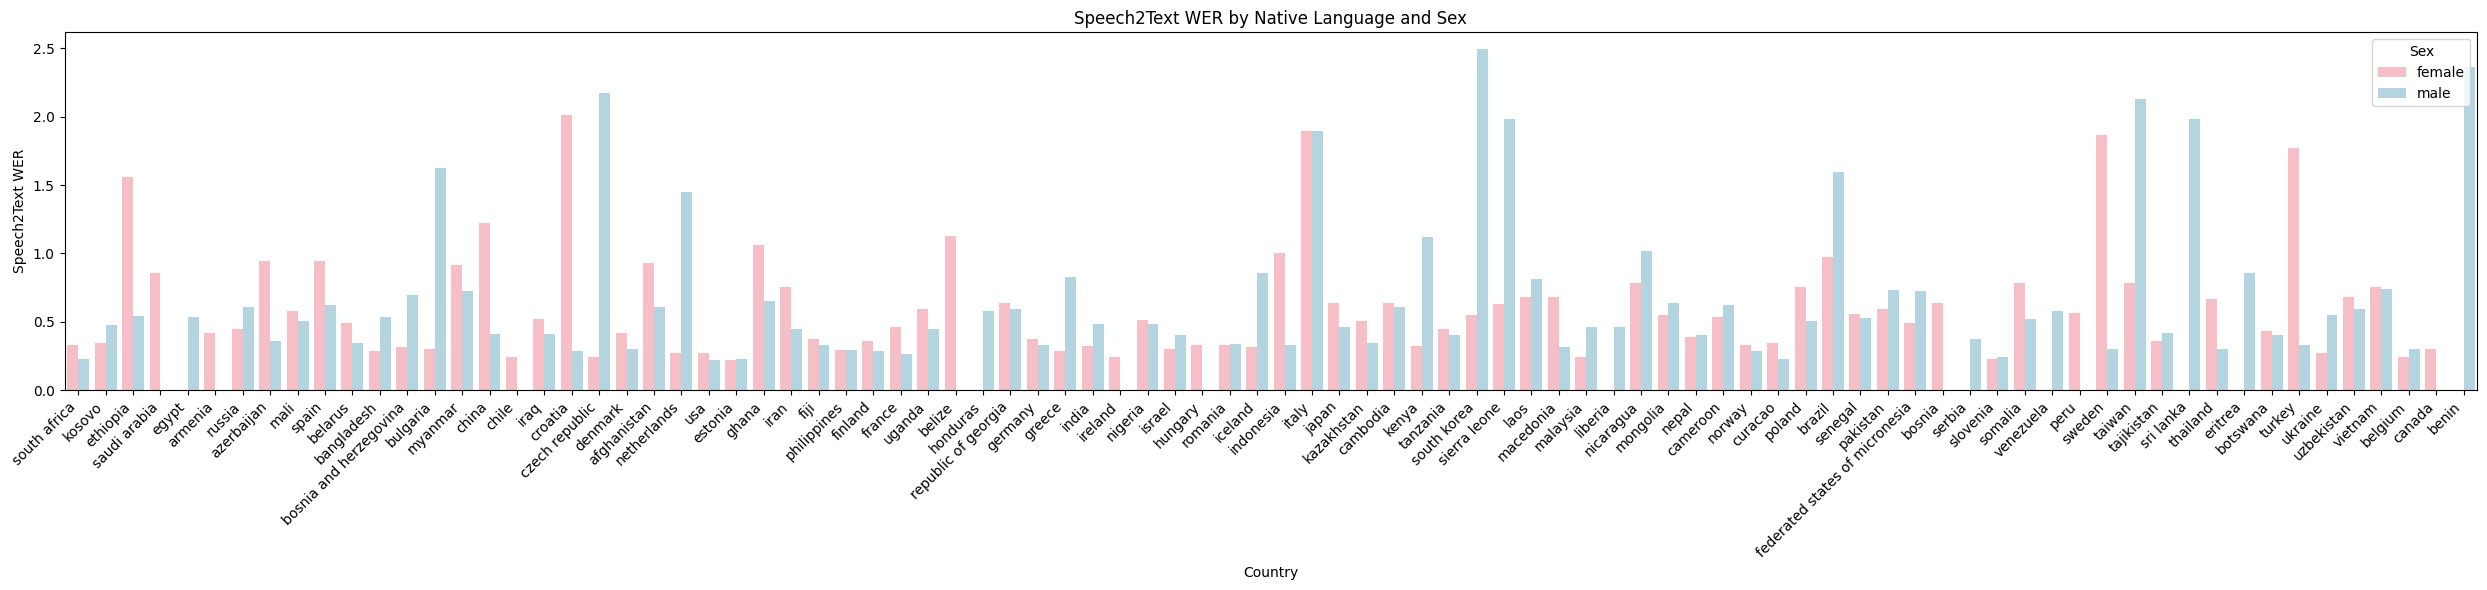

In [ ]:
#Plotting by sex

# Grouped bar plot
f = plt.figure(figsize=(25, 6))
ax = f.add_subplot(1, 1, 1)
color_palette = {"male": "lightblue", "female": "lightpink"}

# Plot
sns.barplot(data=post_data, x="country", y="WER_Speech2Text", hue="sex", ax=ax,
            palette=color_palette, ci=None)

# Customizing the plot
ax.set_title("Speech2Text WER by Native Language and Sex")
ax.set_xlabel("Country")
ax.set_ylabel("Speech2Text WER")
ax.legend(title="Sex", loc="upper right")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

<ipython-input-57-6367a88446ac>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=average_wer, x="country", y="WER_Speech2Text", ax=ax,
<ipython-input-57-6367a88446ac>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_wer, x="country", y="WER_Speech2Text", ax=ax,
<ipython-input-57-6367a88446ac>:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in legend_colors]


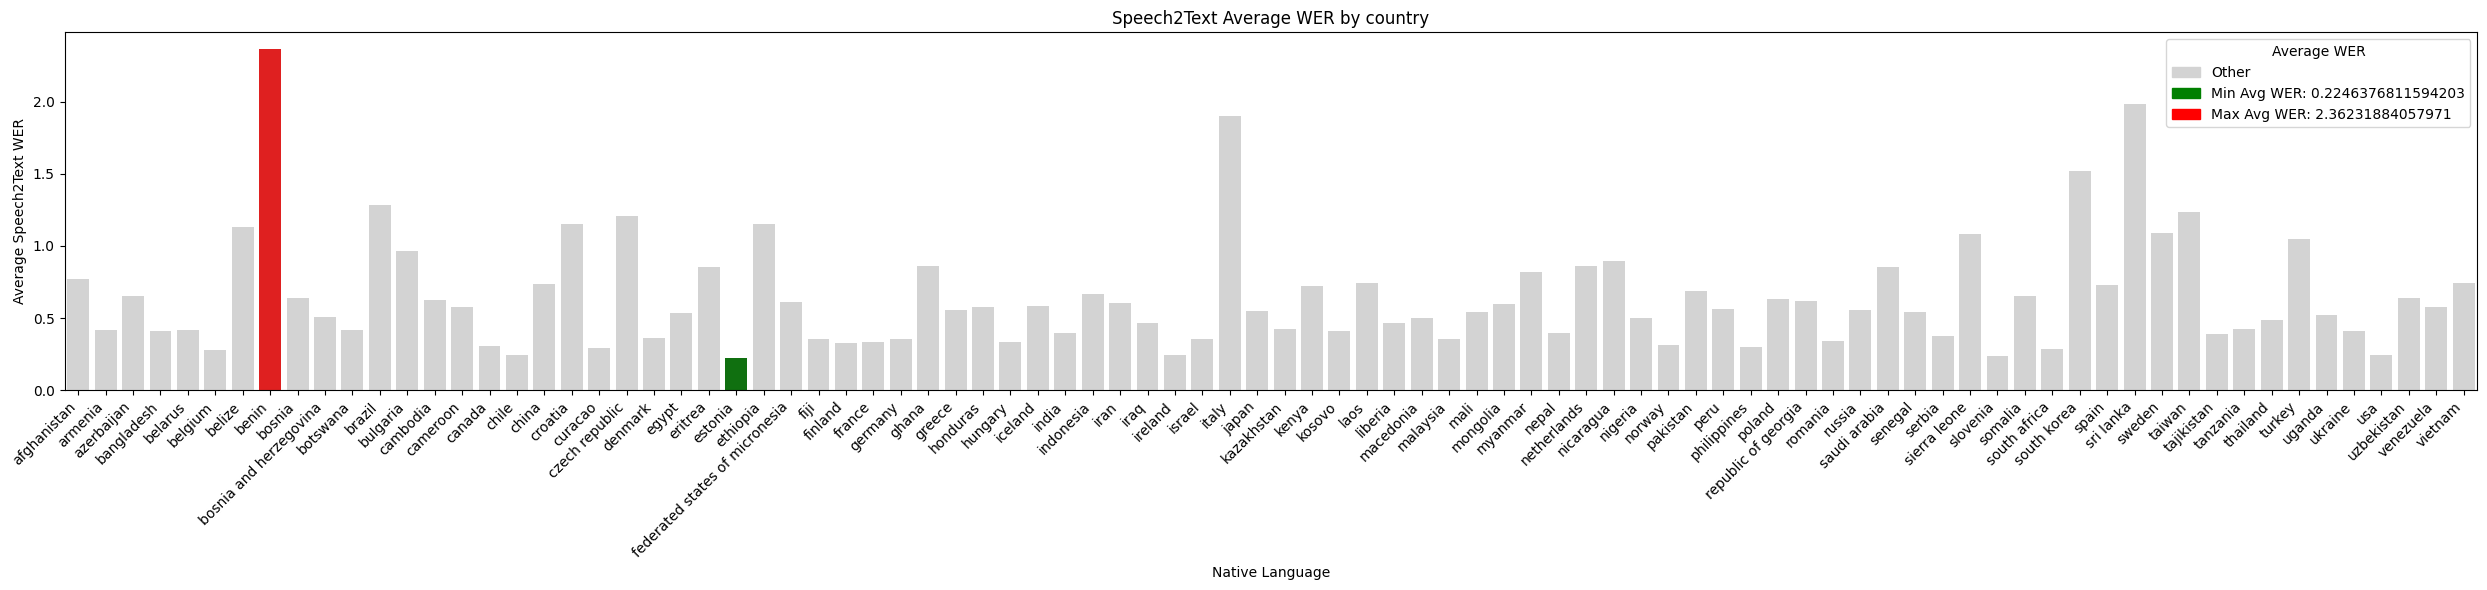

In [ ]:
#Plotting by average WER by country

# Calculate average WER by country
average_wer = post_data.groupby('country')['WER_Speech2Text'].mean().reset_index()

# Find minimum and maximum average WER values
min_avg_wer = average_wer['WER_Speech2Text'].min()
max_avg_wer = average_wer['WER_Speech2Text'].max()

# Define custom color palette
palette = ['lightgrey' if x != min_avg_wer and x != max_avg_wer else 'green' if x == min_avg_wer else 'red' for x in average_wer['WER_Speech2Text']]

# Grouped bar plot
f = plt.figure(figsize=(25, 6))
ax = f.add_subplot(1, 1, 1)

# Plot with custom color palette
sns.barplot(data=average_wer, x="country", y="WER_Speech2Text", ax=ax,
            palette=palette, ci=None)

# Customizing the plot
ax.set_title("Speech2Text Average WER by country")
ax.set_xlabel("Native Language")
ax.set_ylabel("Average Speech2Text WER")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels

# Add legend for custom colors
legend_labels = ['Other', f'Min Avg WER: {min_avg_wer}', f'Max Avg WER: {max_avg_wer}']
legend_colors = ['lightgrey', 'green', 'red']
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in legend_colors]
ax.legend(handles, legend_labels, title="Average WER", loc="upper right")

plt.show()
